In [31]:
import numpy as np # mathematical operations and algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns # Fancier visualizations
sns.set(color_codes=True)
import statistics as stats # fundamental stats package
import matplotlib.pyplot as plt # visualization library
%matplotlib inline
import os
import math
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import jaccard_score
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import category_encoders as ce
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import auc 
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pydotplus

In [32]:
#author Ozgur Tarim 

In [33]:
col_names = ['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC', 'NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','NObeyesdad']
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv',header=None, names=col_names) 

In [34]:
print(data.info())
data.describe()
print((data.head()))
print("===========================================================")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          2112 non-null   object
 1   Age                             2112 non-null   object
 2   Height                          2112 non-null   object
 3   Weight                          2112 non-null   object
 4   family_history_with_overweight  2112 non-null   object
 5   FAVC                            2112 non-null   object
 6   FCVC                            2112 non-null   object
 7   NCP                             2112 non-null   object
 8   CAEC                            2112 non-null   object
 9   SMOKE                           2112 non-null   object
 10  CH2O                            2112 non-null   object
 11  SCC                             2112 non-null   object
 12  FAF                             2112 non-null   

In [35]:
gender = data["Gender"]
age = data["Age"]
height = data["Height"]
weight = data["Weight"]
familyhistorywithOverweight = data["family_history_with_overweight"]
favc = data["FAVC"] #Frequent consumption of high caloric food 
fcvc = data["FCVC"] #Frequency of consumption of vegetables
ncp= data["NCP"]    #Number of main meals 
caec = data["CAEC"]  #Consumption of food between meals
smoke = data["SMOKE"]
ch20 = data["CH2O"]  #Consumption of water daily 
scc = data["SCC"]    #Calories consumption monitoring
faf = data["FAF"]    #Physical activity frequency
tue = data["TUE"]    #Time using technology devices
calc = data["CALC"]   #and Consumption of alcohol
mtrans = data["MTRANS"] #Transportation used
nobeyesdadClass = data["NObeyesdad"] #all data was labeled and the class variable NObesity was created with the values of

In [36]:
# print("Making sure everything has a value through heatmap checking")

print("===========================================================")

print("===========================================================")

print("Converting categorical binary values into numerical binary values: (Yes:1, No:0 )")

print("Converting categorical binary values into numerical binary values: (Male:1, Female:0 )")

print("Converting categorical binary values into numerical binary values: (Always:0, Frequently:1,Sometimes:2, no:3 )")

print("Converting categorical binary values into numerical binary values: (Bike:0, Walking:1,Public_Transportation:2, Motorbike:3,Automobile:4 )")

print("Converting categorical binary values into numerical binary values: (Insufficient_Weight:0, Normal_Weight:1,Overweight_Level_I:2, Overweight_Level_II:3,Obesity_Type_I:4,Obesity_Type_II:5,Obesity_Type_III:6  )")

print("===========================================================")


data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})

data["FAVC"] = data["FAVC"].map({"yes": 1, "no": 0})

data["family_history_with_overweight"] = data["family_history_with_overweight"].map({"yes": 1, "no": 0})

data["SMOKE"] = data["SMOKE"].map({"yes": 1, "no": 0})

data["SCC"] = data["SCC"].map({"yes": 1, "no": 0})

data["CAEC"] = data["CAEC"].map({"Always": 0,"Frequently": 1,"Sometimes":2 , "no": 3}) #being always to no 0-3

data["CALC"] = data["CALC"].map({"Always": 0,"Frequently": 1,"Sometimes":2 , "no": 3}) #being always to no 0-3

data["MTRANS"] = data["MTRANS"].map({"Bike": 0,"Walking": 1,"Public_Transportation":2 ,"Motorbike": 3, "Automobile": 4}) #being active to less active 0-4 

data["NObeyesdad"] = data["NObeyesdad"].map({"Insufficient_Weight": 0,"Normal_Weight": 1,"Overweight_Level_I":2 , "Overweight_Level_II": 3, "Obesity_Type_I": 4,"Obesity_Type_II": 5,"Obesity_Type_III": 6})

print(data)

Converting categorical binary values into numerical binary values: (Yes:1, No:0 )
Converting categorical binary values into numerical binary values: (Male:1, Female:0 )
Converting categorical binary values into numerical binary values: (Always:0, Frequently:1,Sometimes:2, no:3 )
Converting categorical binary values into numerical binary values: (Bike:0, Walking:1,Public_Transportation:2, Motorbike:3,Automobile:4 )
Converting categorical binary values into numerical binary values: (Insufficient_Weight:0, Normal_Weight:1,Overweight_Level_I:2, Overweight_Level_II:3,Obesity_Type_I:4,Obesity_Type_II:5,Obesity_Type_III:6  )
      Gender        Age    Height      Weight  family_history_with_overweight  \
0        NaN        Age    Height      Weight                             NaN   
1        0.0         21      1.62          64                             1.0   
2        0.0         21      1.52          56                             1.0   
3        1.0         23       1.8          77     

In [37]:
corrdata = data.corr()
corrdata.style

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.102512,0.064934,0.091543,0.044698,-0.102633,0.007616,0.119979,-0.031464
family_history_with_overweight,0.102512,1.000000,0.208036,0.169787,0.017385,-0.185422,0.036676,0.104944,0.505148
FAVC,0.064934,0.208036,1.000000,0.150068,-0.050660,-0.190658,-0.089520,0.096228,0.247793
CAEC,0.091543,0.169787,0.150068,1.000000,-0.055282,-0.109179,-0.047540,0.054167,0.329350
SMOKE,0.044698,0.017385,-0.050660,-0.055282,1.000000,0.047731,-0.082471,0.012198,0.003442
SCC,-0.102633,-0.185422,-0.190658,-0.109179,0.047731,1.000000,-0.003463,-0.049676,-0.194508
CALC,0.007616,0.036676,-0.089520,-0.047540,-0.082471,-0.003463,1.000000,0.007820,-0.151752
MTRANS,0.119979,0.104944,0.096228,0.054167,0.012198,-0.049676,0.007820,1.000000,0.004146
NObeyesdad,-0.031464,0.505148,0.247793,0.329350,0.003442,-0.194508,-0.151752,0.004146,1.000000


Converting categorical binary values into numerical binary values: (Male:1, Female:0 )
Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )


<AxesSubplot:xlabel='Gender', ylabel='count'>

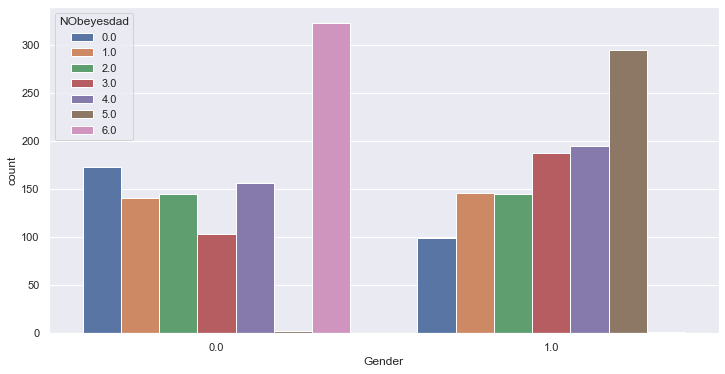

In [38]:
print("Converting categorical binary values into numerical binary values: (Male:1, Female:0 )")
print("===========================================================")

print("Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )")

plt.figure(figsize=(12,6))
sns.countplot(x='Gender',hue='NObeyesdad',data=data)

Converting categorical binary values into numerical binary values: (Yes:1, No:0 )
Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )


<AxesSubplot:xlabel='family_history_with_overweight', ylabel='count'>

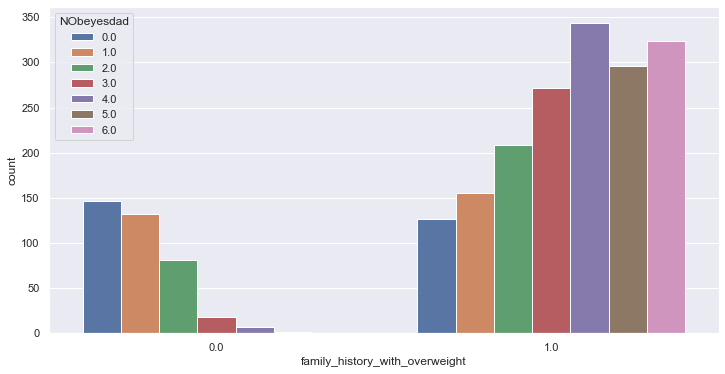

In [39]:
print("Converting categorical binary values into numerical binary values: (Yes:1, No:0 )")
print("===========================================================")

print("Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )")

plt.figure(figsize=(12,6))
sns.countplot(x='family_history_with_overweight',hue='NObeyesdad',data=data)

Converting categorical binary values into numerical binary values: (Yes:1, No:0 )
Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )
FAVC is Frequent consumption of high caloric food 


<AxesSubplot:xlabel='FAVC', ylabel='count'>

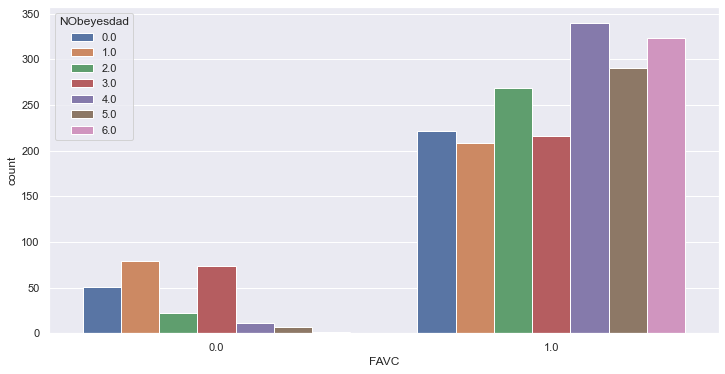

In [40]:
print("Converting categorical binary values into numerical binary values: (Yes:1, No:0 )")
print("===========================================================")

print("Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )")
print("===========================================================")
print("FAVC is Frequent consumption of high caloric food ")

plt.figure(figsize=(12,6))
sns.countplot(x='FAVC',hue='NObeyesdad',data=data)

Converting categorical binary values into numerical binary values: (Always:0, Frequently:1,Sometimes:2, No:3 )
Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )
FAVC is Consumption of food between meals 


<AxesSubplot:xlabel='CAEC', ylabel='count'>

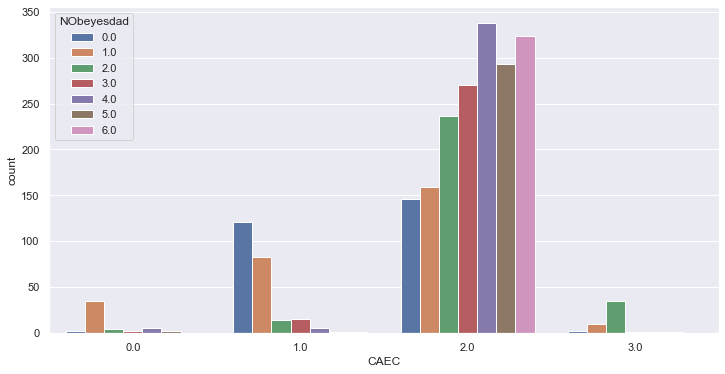

In [41]:
print("Converting categorical binary values into numerical binary values: (Always:0, Frequently:1,Sometimes:2, No:3 )")
print("===========================================================")

print("Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )")
print("===========================================================")
print("FAVC is Consumption of food between meals ")

plt.figure(figsize=(12,6))
sns.countplot(x='CAEC',hue='NObeyesdad',data=data)

Converting categorical binary values into numerical binary values: (Yes:1, No:0 )
Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )
Smoking or not smoking


<AxesSubplot:xlabel='SMOKE', ylabel='count'>

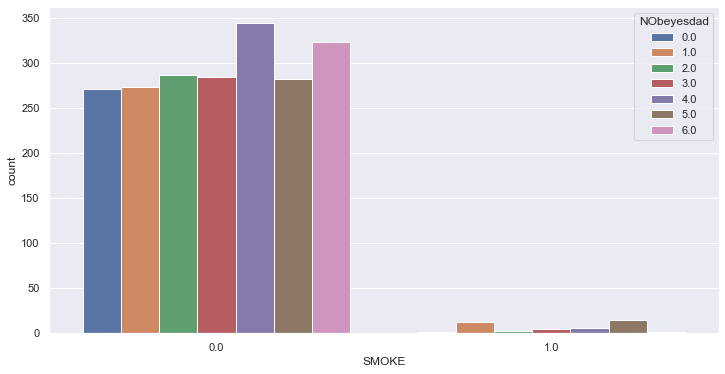

In [42]:
print("Converting categorical binary values into numerical binary values: (Yes:1, No:0 )")
print("===========================================================")

print("Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )")
print("===========================================================")
print("Smoking or not smoking")

plt.figure(figsize=(12,6))
sns.countplot(x='SMOKE',hue='NObeyesdad',data=data)

Converting categorical binary values into numerical binary values: (Yes:1, No:0 )
Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )
SCC is Calories consumption monitoring 


<AxesSubplot:xlabel='SCC', ylabel='count'>

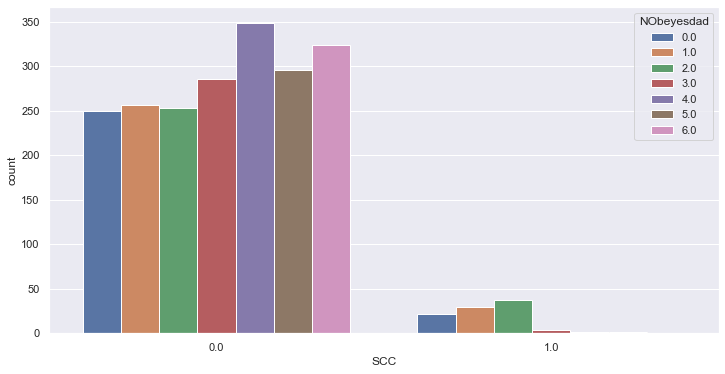

In [43]:
print("Converting categorical binary values into numerical binary values: (Yes:1, No:0 )")
print("===========================================================")

print("Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )")
print("===========================================================")
print("SCC is Calories consumption monitoring ")

plt.figure(figsize=(12,6))
sns.countplot(x='SCC',hue='NObeyesdad',data=data)

Converting categorical binary values into numerical binary values: (Always:0, Frequently:1,Sometimes:2, No:3 )
Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )
CALC is Consumption of alcohol


<AxesSubplot:xlabel='CALC', ylabel='count'>

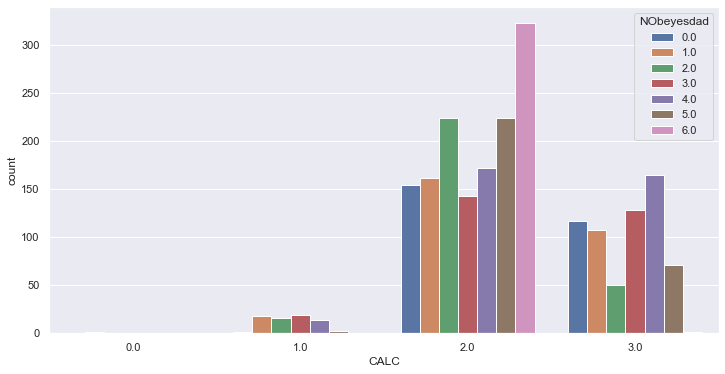

In [44]:
print("Converting categorical binary values into numerical binary values: (Always:0, Frequently:1,Sometimes:2, No:3 )")
print("===========================================================")

print("Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )")
print("===========================================================")
print("CALC is Consumption of alcohol")

plt.figure(figsize=(12,6))
sns.countplot(x='CALC',hue='NObeyesdad',data=data)

Converting categorical binary values into numerical binary values: (Bike:0, Walking:1,Public_Transportation:2, Motorbike:3,Automobile:4)
Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )
MTRANS is Transportation used


<AxesSubplot:xlabel='MTRANS', ylabel='count'>

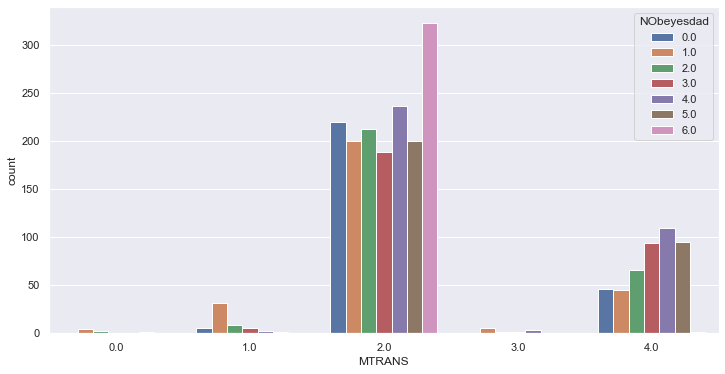

In [45]:
print("Converting categorical binary values into numerical binary values: (Bike:0, Walking:1,Public_Transportation:2, Motorbike:3,Automobile:4)")
print("===========================================================")

print("Numerical binary values:(Insufficient_Weight:0, Normal_Weight:1, Overweight_Level_I:2, Overweight_Level_II:3, Obesity_Type_I:4, Obesity_Type_II:5, Obesity_Type_III:6  )")
print("===========================================================")
print("MTRANS is Transportation used")

plt.figure(figsize=(12,6))
sns.countplot(x='MTRANS',hue='NObeyesdad',data=data)

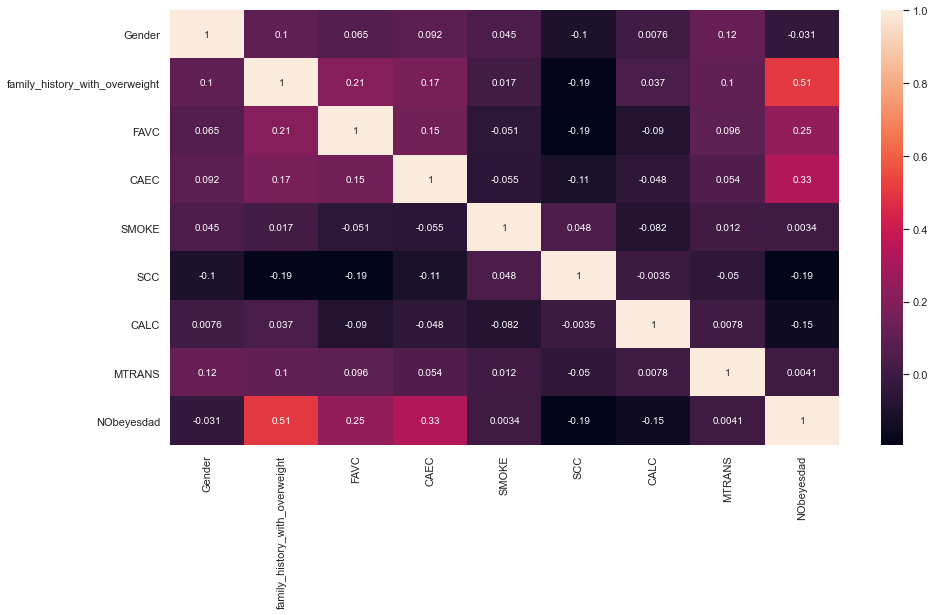

In [46]:
ax, fig = plt.subplots(figsize=(15, 8))
plt.show(sns.heatmap(corrdata, annot=True))

In [47]:
#training the dataset using train test split python function

X = data[['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC', 'NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS']]

y = data['NObeyesdad']


X, y = X[1:], y[1:]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)


In [48]:
data_inputs = data[['Age','Height','Weight','family_history_with_overweight','FAVC','FCVC', 'NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS']].values
data_targets = data['NObeyesdad'].values



In [49]:
(data_train, data_test, data_train_target, data_test_target) = train_test_split(data_inputs, data_targets, test_size=0.4, random_state=1)

In [50]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
cols_without_age = list(X_train.columns[:])
cols_without_age.remove('Age')
clf = clf.fit(X_train[cols_without_age], y_train)

In [51]:
y_pred = clf.predict(X_test[cols_without_age])


In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9463722397476341


In [53]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  


In [54]:
feature_cols = ['Height','Weight','family_history_with_overweight','FAVC','FCVC', 'NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','NObeyesdad']
X = data[feature_cols]
y = data.NObeyesdad


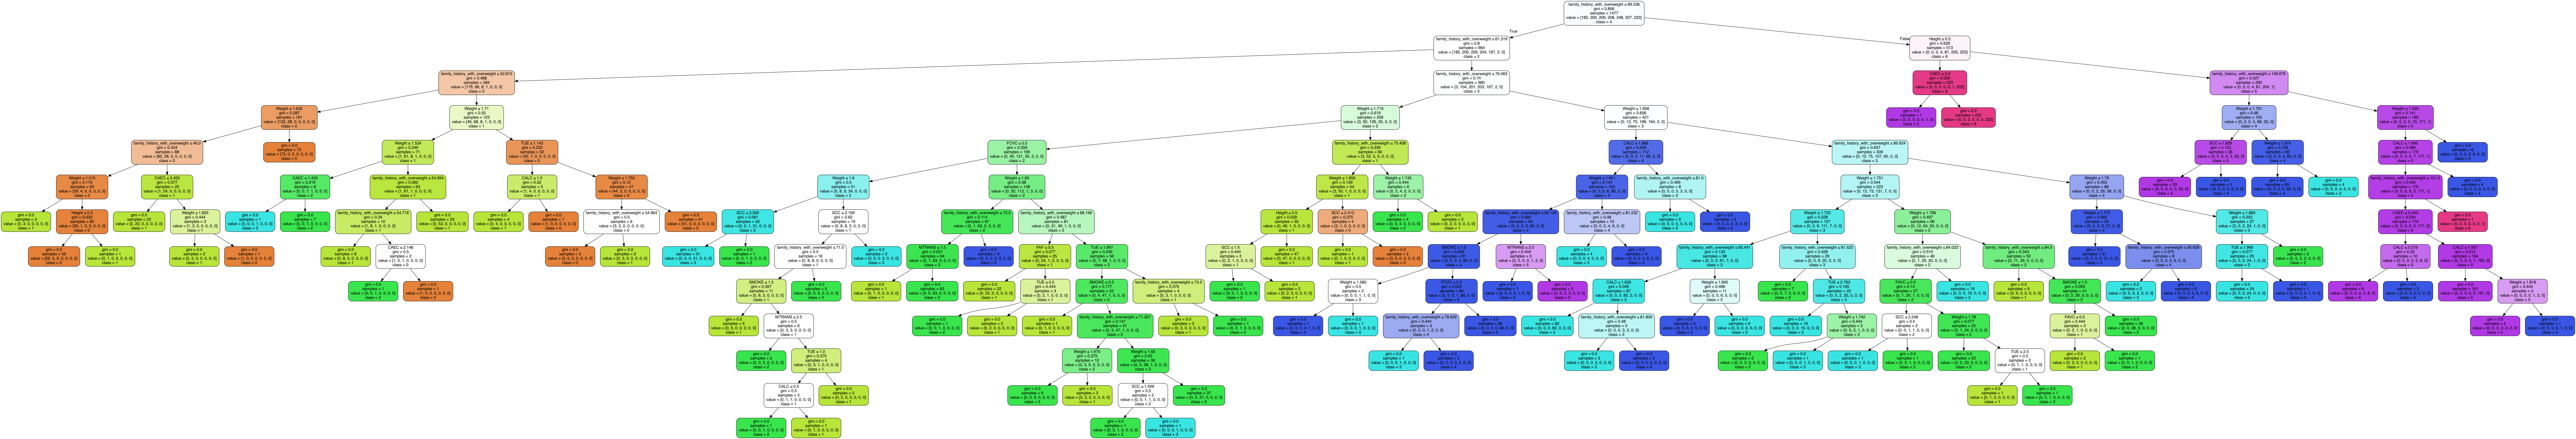

In [55]:
import graphviz
from sklearn.tree import export_graphviz

from io import StringIO
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('test.png')
Image(graph.create_png())
#dot_data

In [56]:
feature_cols = ['Age','Height','Weight','family_history_with_overweight','FAVC','FCVC', 'NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','NObeyesdad']
X = data[feature_cols]
y = data.NObeyesdad

In [57]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



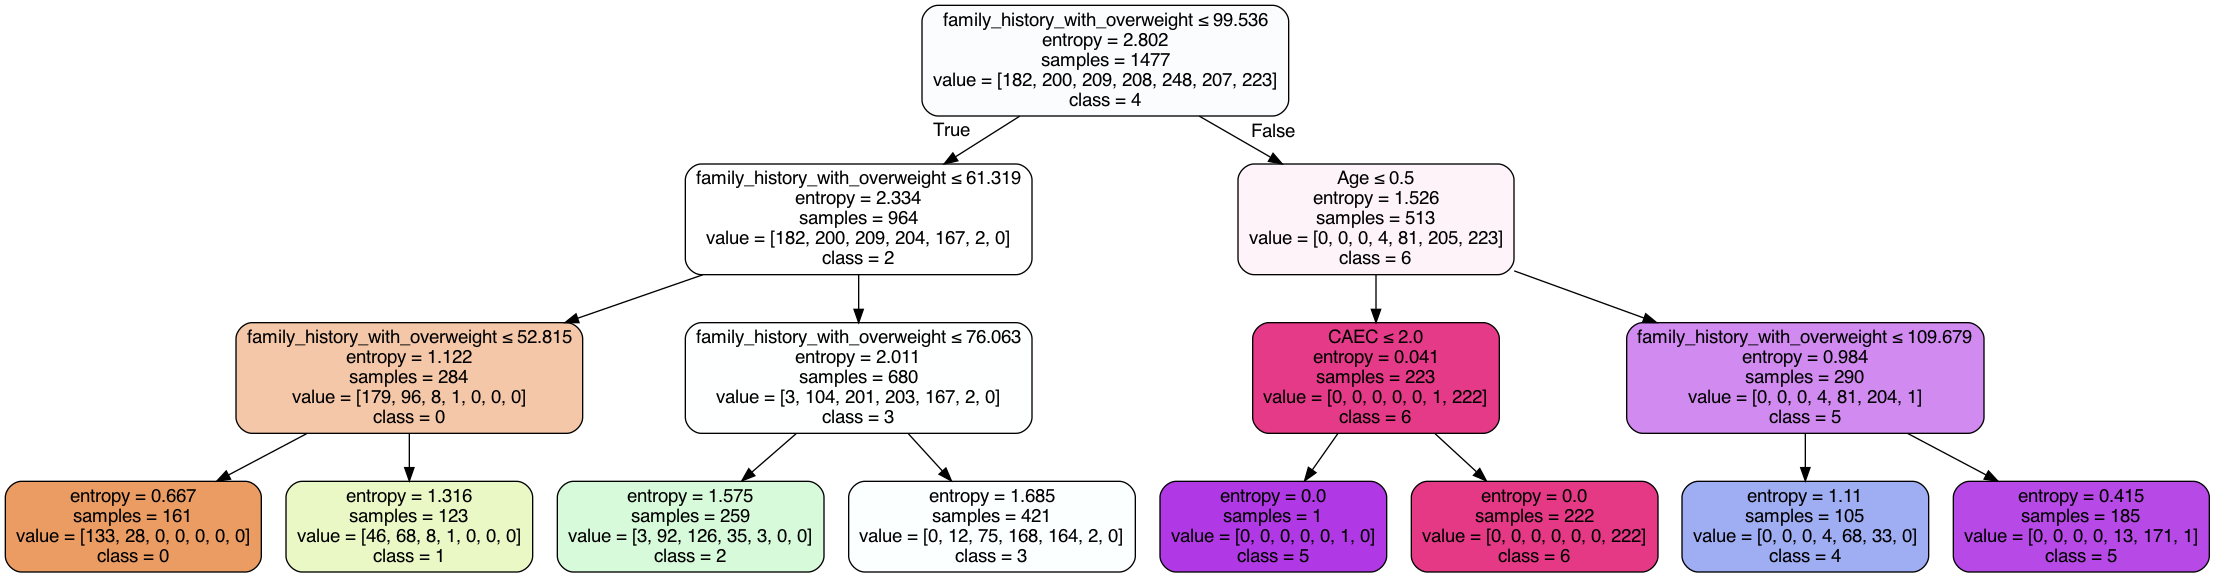

In [58]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1','2','3','4','5','6'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('smalltree.png')
Image(graph.create_png())